In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('../data/220810.xlsx')
data = data.fillna(method='ffill')
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Total Accuracy,Accuracy_OSA,Accuracy_insomnia,"Accuracy_PLMD,RLS",Accuracy_parasomnia,Accuracy_circadian,...,"F1_PLMD,RLS",F1_parasomnia,F1_circadian,"F1_Narcolepsy,EDS,Hypersomnia",F1_Catathrenia,F1_control,F1_micro,F1_macro,F1_weighted,F1_samples
0,Logistic Regression,ISI,MultiOutputClassifier,method A,0.639599,0.746350,0.900547,0.887774,0.954380,0.983577,...,0,0.0,0,0,0,0.0,0.703353,0.106844,0.568446,0.709398
1,Logistic Regression,ISI,MultiOutputClassifier,method B,0.634124,0.750000,0.899635,0.887774,0.954380,0.983577,...,0,0.0,0,0,0,0.0,0.702469,0.106936,0.568932,0.703315
2,Logistic Regression,ISI,ClassifierChain,method A,0.639599,0.746350,0.900547,0.887774,0.954380,0.983577,...,0,0.0,0,0,0,0.0,0.703353,0.106844,0.568446,0.709398
3,Logistic Regression,ISI,ClassifierChain,method B,0.006387,0.253650,0.900547,0.887774,0.954380,0.983577,...,0,0.0,0,0,0,0.0,0.000000,0.000000,0.000000,0.000000
4,Logistic Regression,ESS,MultiOutputClassifier,method A,0.648673,0.763038,0.917658,0.882891,0.955169,0.982617,...,0,0.0,0,0,0,0.0,0.715880,0.108199,0.583594,0.723452


In [3]:
data.rename(columns={'Unnamed: 0':'ML_Algorithm', 'Unnamed: 1':'dataset', 'Unnamed: 2': 'multi label', 'Unnamed: 3': 'grid search method'}, inplace=True)
data.head()

,ML_Algorithm,dataset,multi label,grid search method,Total Accuracy,Accuracy_OSA,Accuracy_insomnia,"Accuracy_PLMD,RLS",Accuracy_parasomnia,Accuracy_circadian,...,"F1_PLMD,RLS",F1_parasomnia,F1_circadian,"F1_Narcolepsy,EDS,Hypersomnia",F1_Catathrenia,F1_control,F1_micro,F1_macro,F1_weighted,F1_samples
0,Logistic Regression,ISI,MultiOutputClassifier,method A,0.639599,0.746350,0.900547,0.887774,0.954380,0.983577,...,0,0.0,0,0,0,0.0,0.703353,0.106844,0.568446,0.709398
1,Logistic Regression,ISI,MultiOutputClassifier,method B,0.634124,0.750000,0.899635,0.887774,0.954380,0.983577,...,0,0.0,0,0,0,0.0,0.702469,0.106936,0.568932,0.703315
2,Logistic Regression,ISI,ClassifierChain,method A,0.639599,0.746350,0.900547,0.887774,0.954380,0.983577,...,0,0.0,0,0,0,0.0,0.703353,0.106844,0.568446,0.709398
3,Logistic Regression,ISI,ClassifierChain,method B,0.006387,0.253650,0.900547,0.887774,0.954380,0.983577,...,0,0.0,0,0,0,0.0,0.000000,0.000000,0.000000,0.000000
4,Logistic Regression,ESS,MultiOutputClassifier,method A,0.648673,0.763038,0.917658,0.882891,0.955169,0.982617,...,0,0.0,0,0,0,0.0,0.715880,0.108199,0.583594,0.723452


In [4]:
df = data.pivot_table(index='ML_Algorithm', columns=['dataset', 'multi label', 'grid search method'], values='Total Accuracy')
df

dataset                         ESS                                            \
multi label         ClassifierChain           MultiOutputClassifier             
grid search method         method A  method B              method A  method B   
ML_Algorithm                                                                    
LightGBM                   0.648673       NaN              0.648673       NaN   
Logistic Regression        0.648673  0.005489              0.648673  0.648673   
Random Forest              0.648673  0.648673              0.648673  0.648673   
SVM                        0.648673       NaN              0.648673       NaN   
XGBoost                    0.648673       NaN              0.648673       NaN   

dataset                         ISI                                            \
multi label         ClassifierChain           MultiOutputClassifier             
grid search method         method A  method B              method A  method B   
ML_Algorithm                                                                    
LightGBM                   0.639599       NaN              0.639599       NaN   
Logistic Regression        0.639599  0.006387              0.639599  0.634124   
Random Forest              0.639599  0.636861              0.639599  0.631387   
SVM                        0.639599       NaN              0.639599       NaN   
XGBoost                    0.639599       NaN              0.638686       NaN   

dataset                         SSQ                                            
multi label         ClassifierChain           MultiOutputClassifier            
grid search method         method A  method B              method A  method B  
ML_Algorithm                                                                   
LightGBM                   0.696897       NaN              0.696897       NaN  
Logistic Regression        0.696897  0.715990              0.696897  0.663484  
Random Forest              0.696897  0.699284              0.668258  0.642005  
SVM                        0.696897       NaN              0.696897       NaN  
XGBoost                    0.715990       NaN              0.665871       NaN

In [5]:
data_columns = data.columns[4:].tolist()
cols_list = [data_columns[i:i+6] for i in range(0, len(data_columns), 6)]

In [6]:
cols_list

[['Total Accuracy',
  'Accuracy_OSA',
  'Accuracy_insomnia',
  'Accuracy_PLMD,RLS',
  'Accuracy_parasomnia',
  'Accuracy_circadian'],
 ['Accuracy_Narcolepsy,EDS,Hypersomnia',
  'Accuracy_Catathrenia',
  'Accuracy_control',
  'Precision_OSA',
  'Precision_insomnia',
  'Precision_PLMD,RLS'],
 ['Precision_parasomnia',
  'Precision_circadian',
  'Precision_Narcolepsy,EDS,Hypersomnia',
  'Precision_Catathrenia',
  'Precision_control',
  'Precision_micro'],
 ['Precision_macro',
  'Precision_weighted',
  'Precision_samples',
  'Recall_OSA',
  'Recall_insomnia',
  'Recall_PLMD,RLS'],
 ['Recall_parasomnia',
  'Recall_circadian',
  'Recall_Narcolepsy,EDS,Hypersomnia',
  'Recall_Catathrenia',
  'Recall_control',
  'Recall_micro'],
 ['Recall_macro',
  'Recall_weighted',
  'Recall_samples',
  'F1_OSA',
  'F1_insomnia',
  'F1_PLMD,RLS'],
 ['F1_parasomnia',
  'F1_circadian',
  'F1_Narcolepsy,EDS,Hypersomnia',
  'F1_Catathrenia',
  'F1_control',
  'F1_micro'],
 ['F1_macro', 'F1_weighted', 'F1_samples'

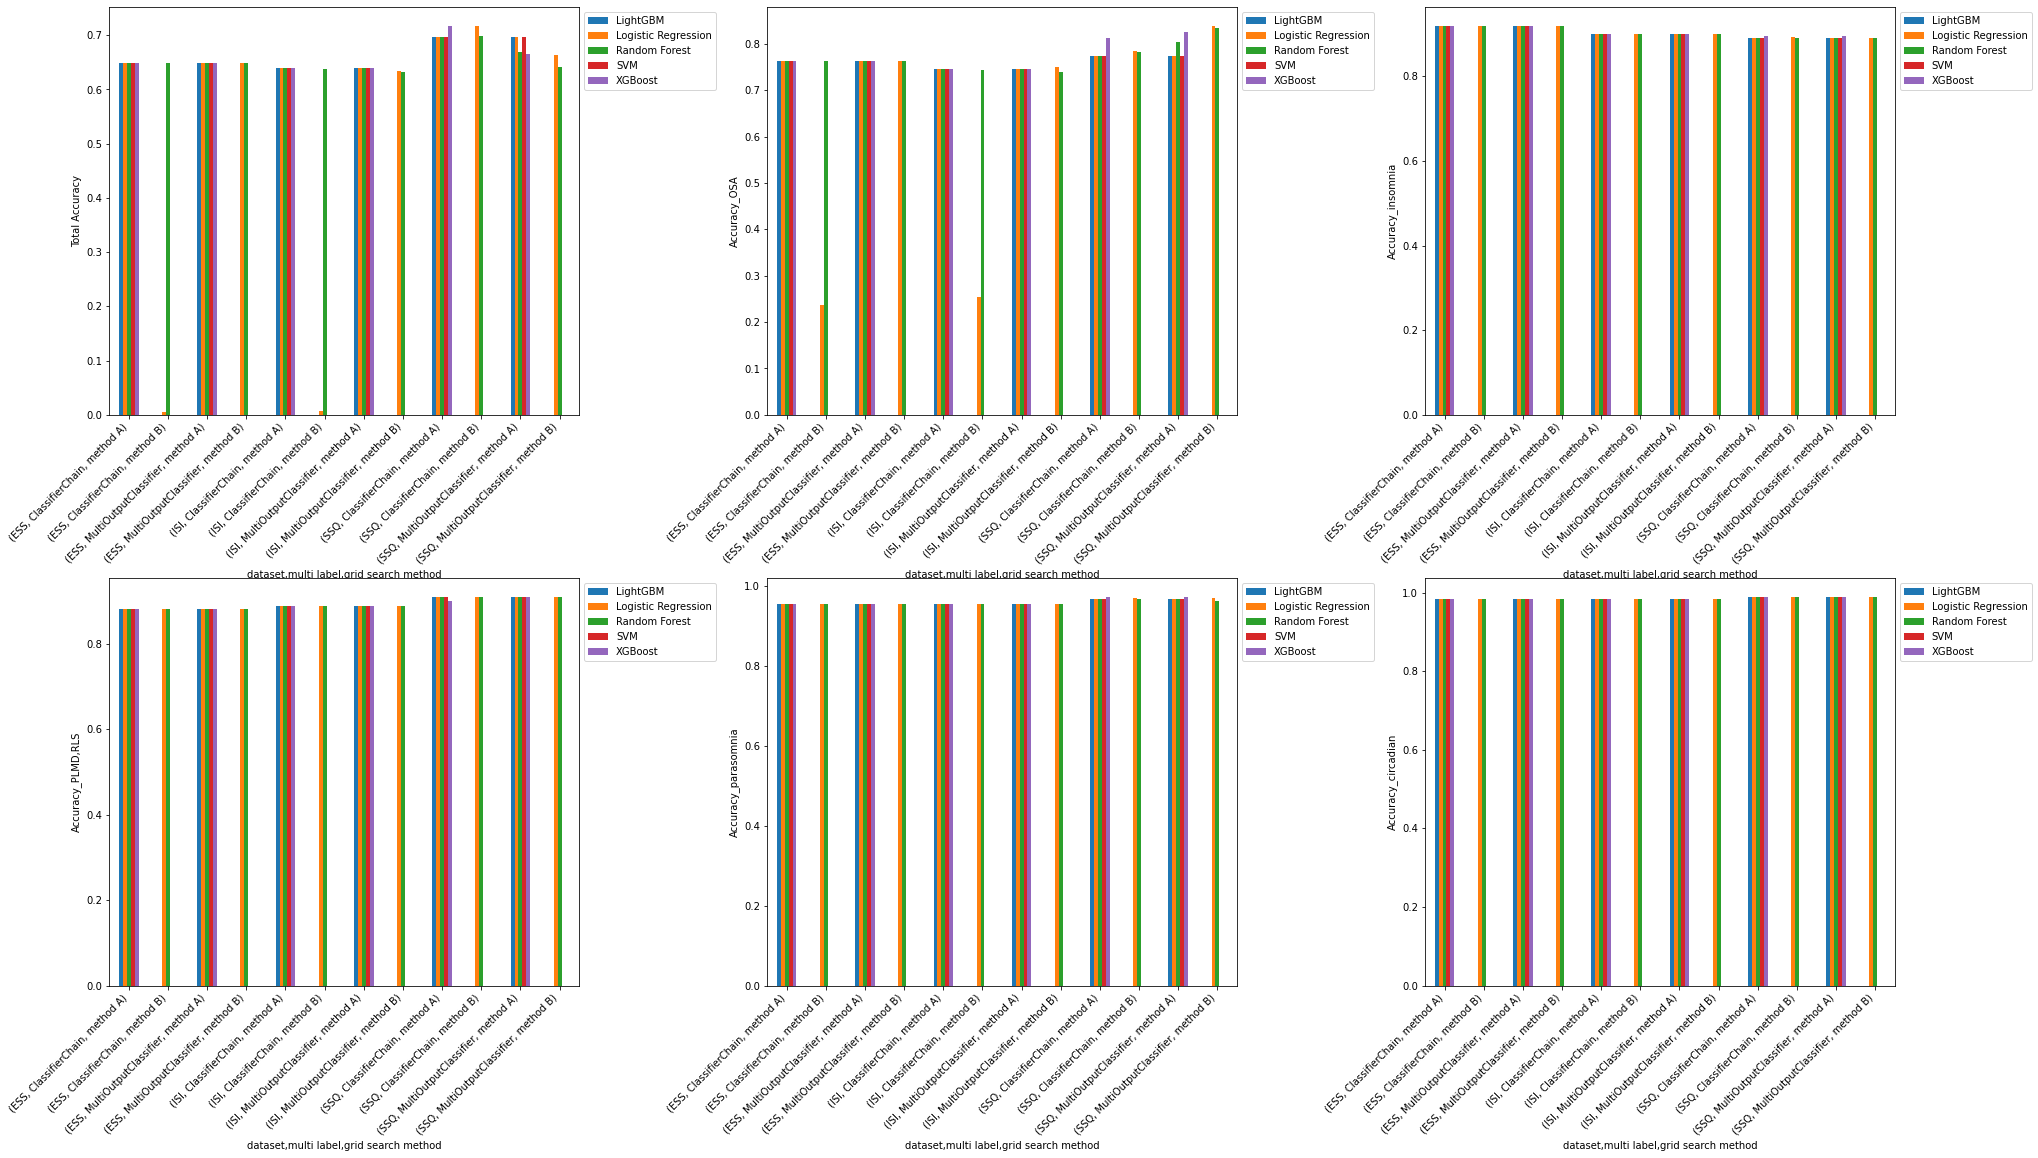

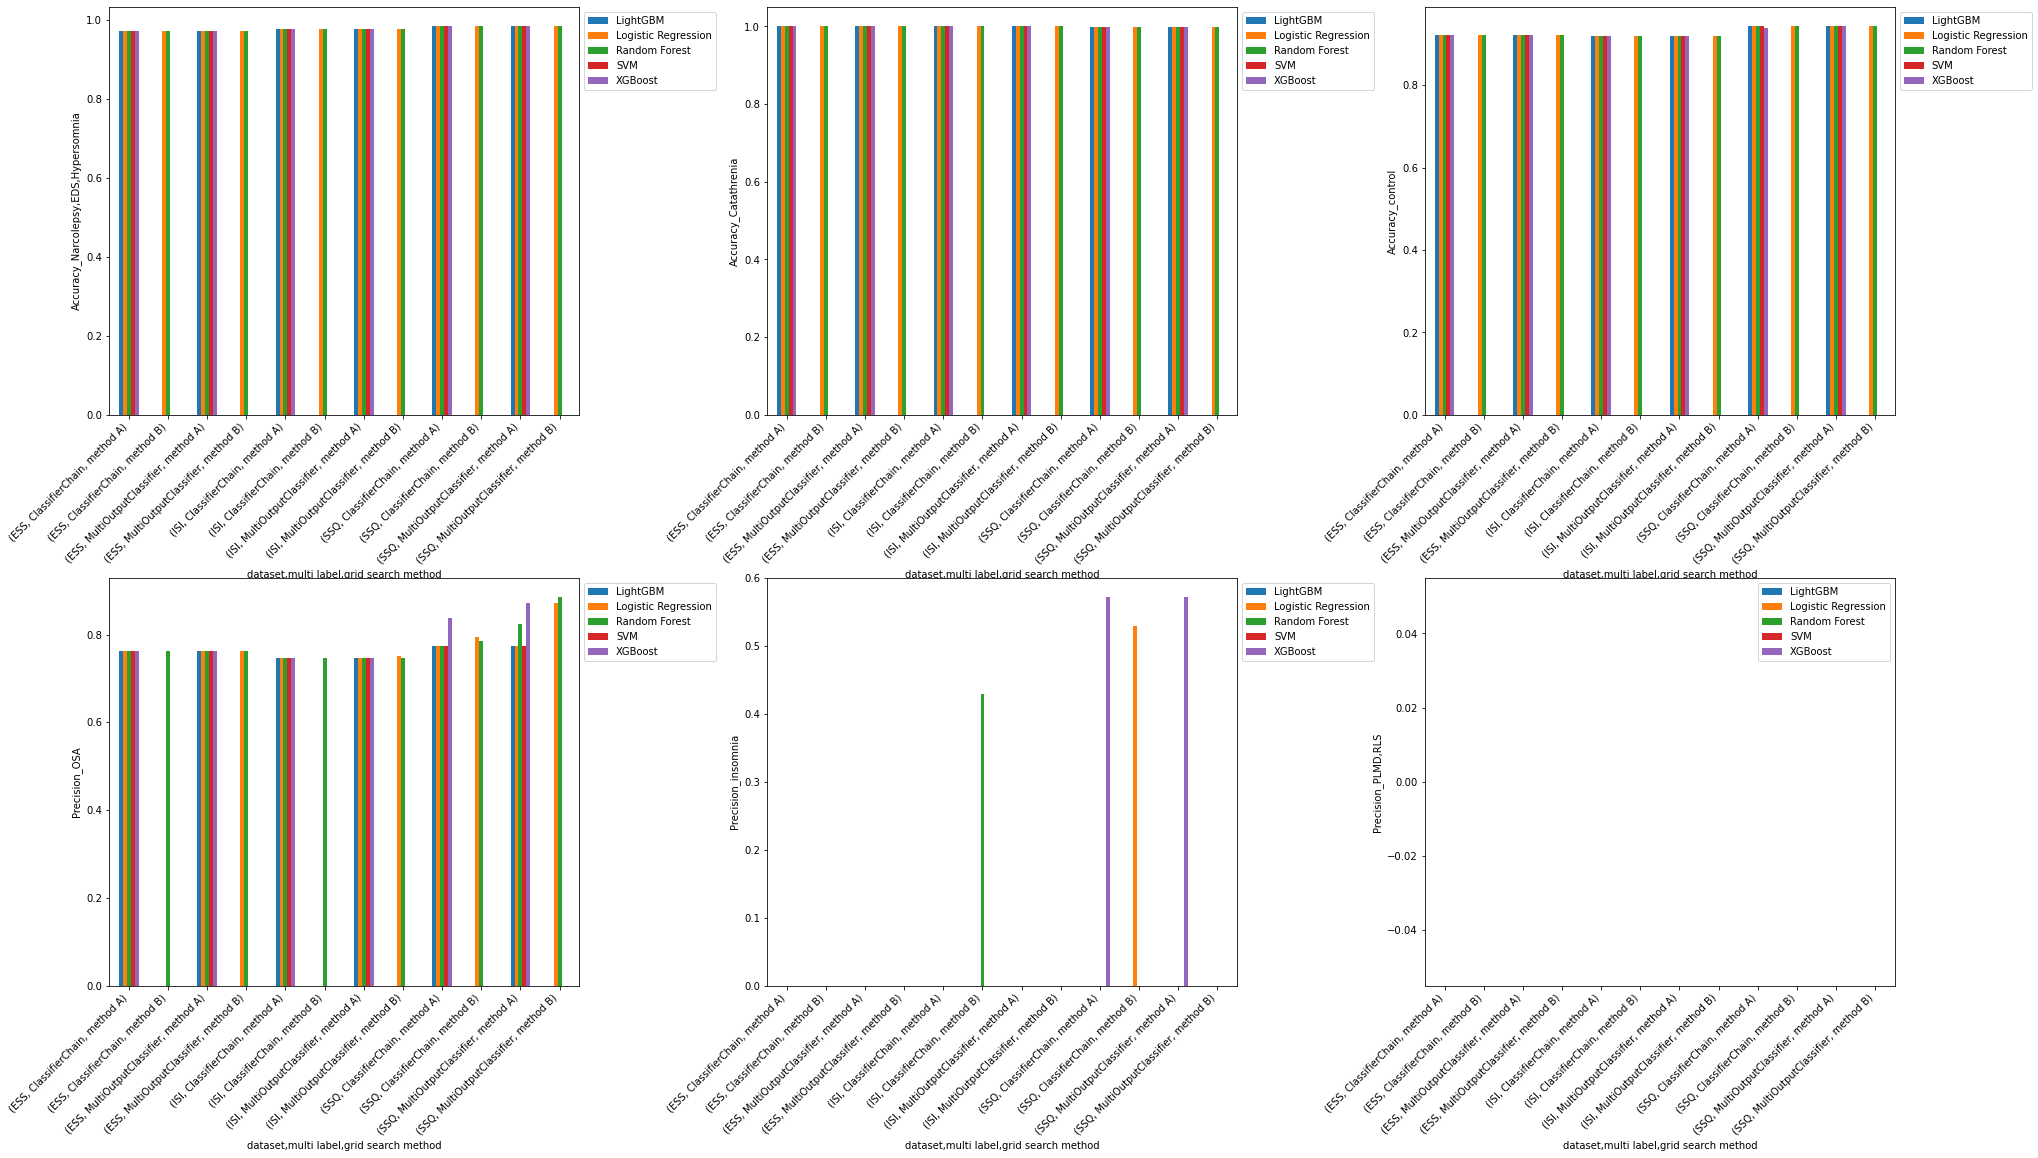

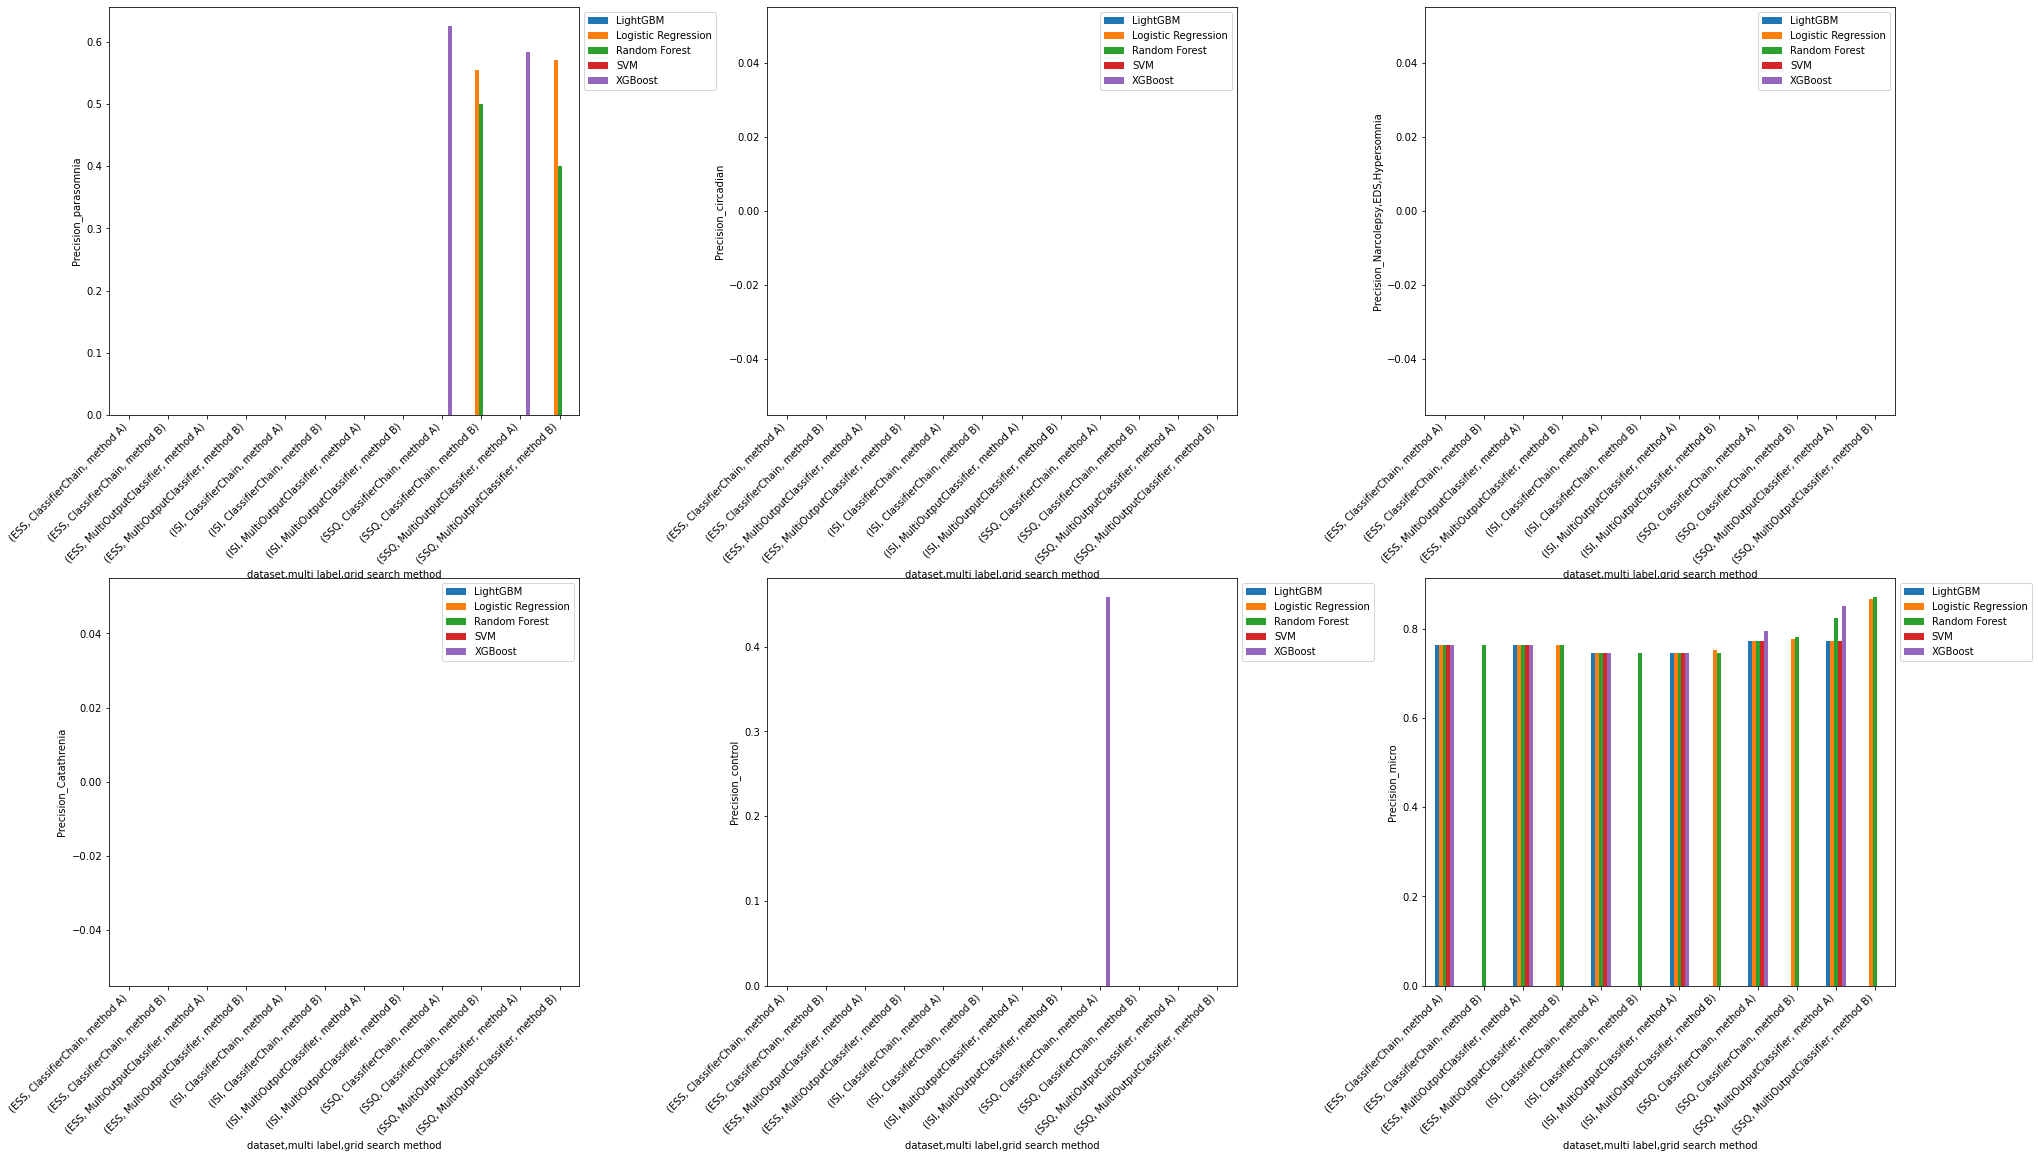

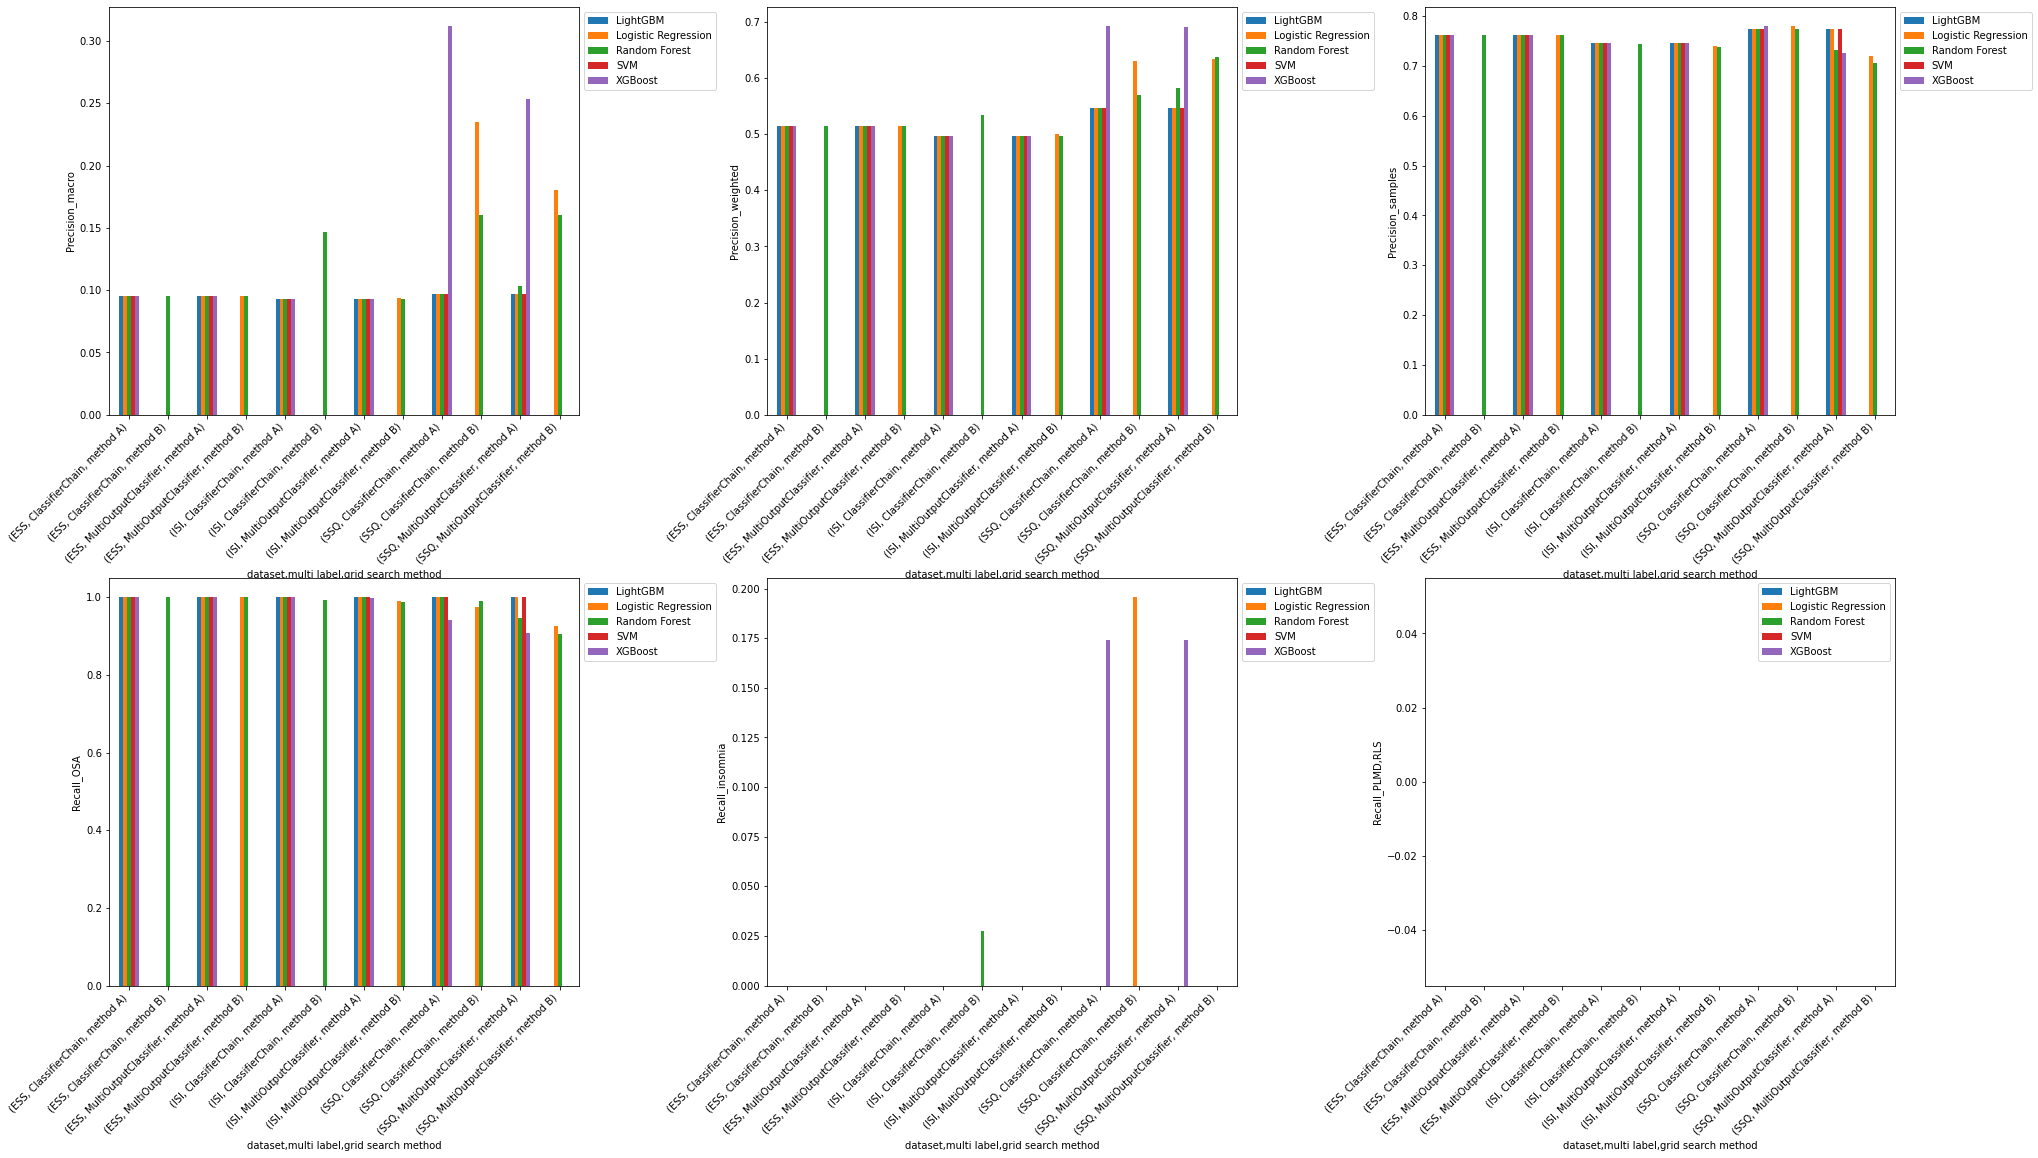

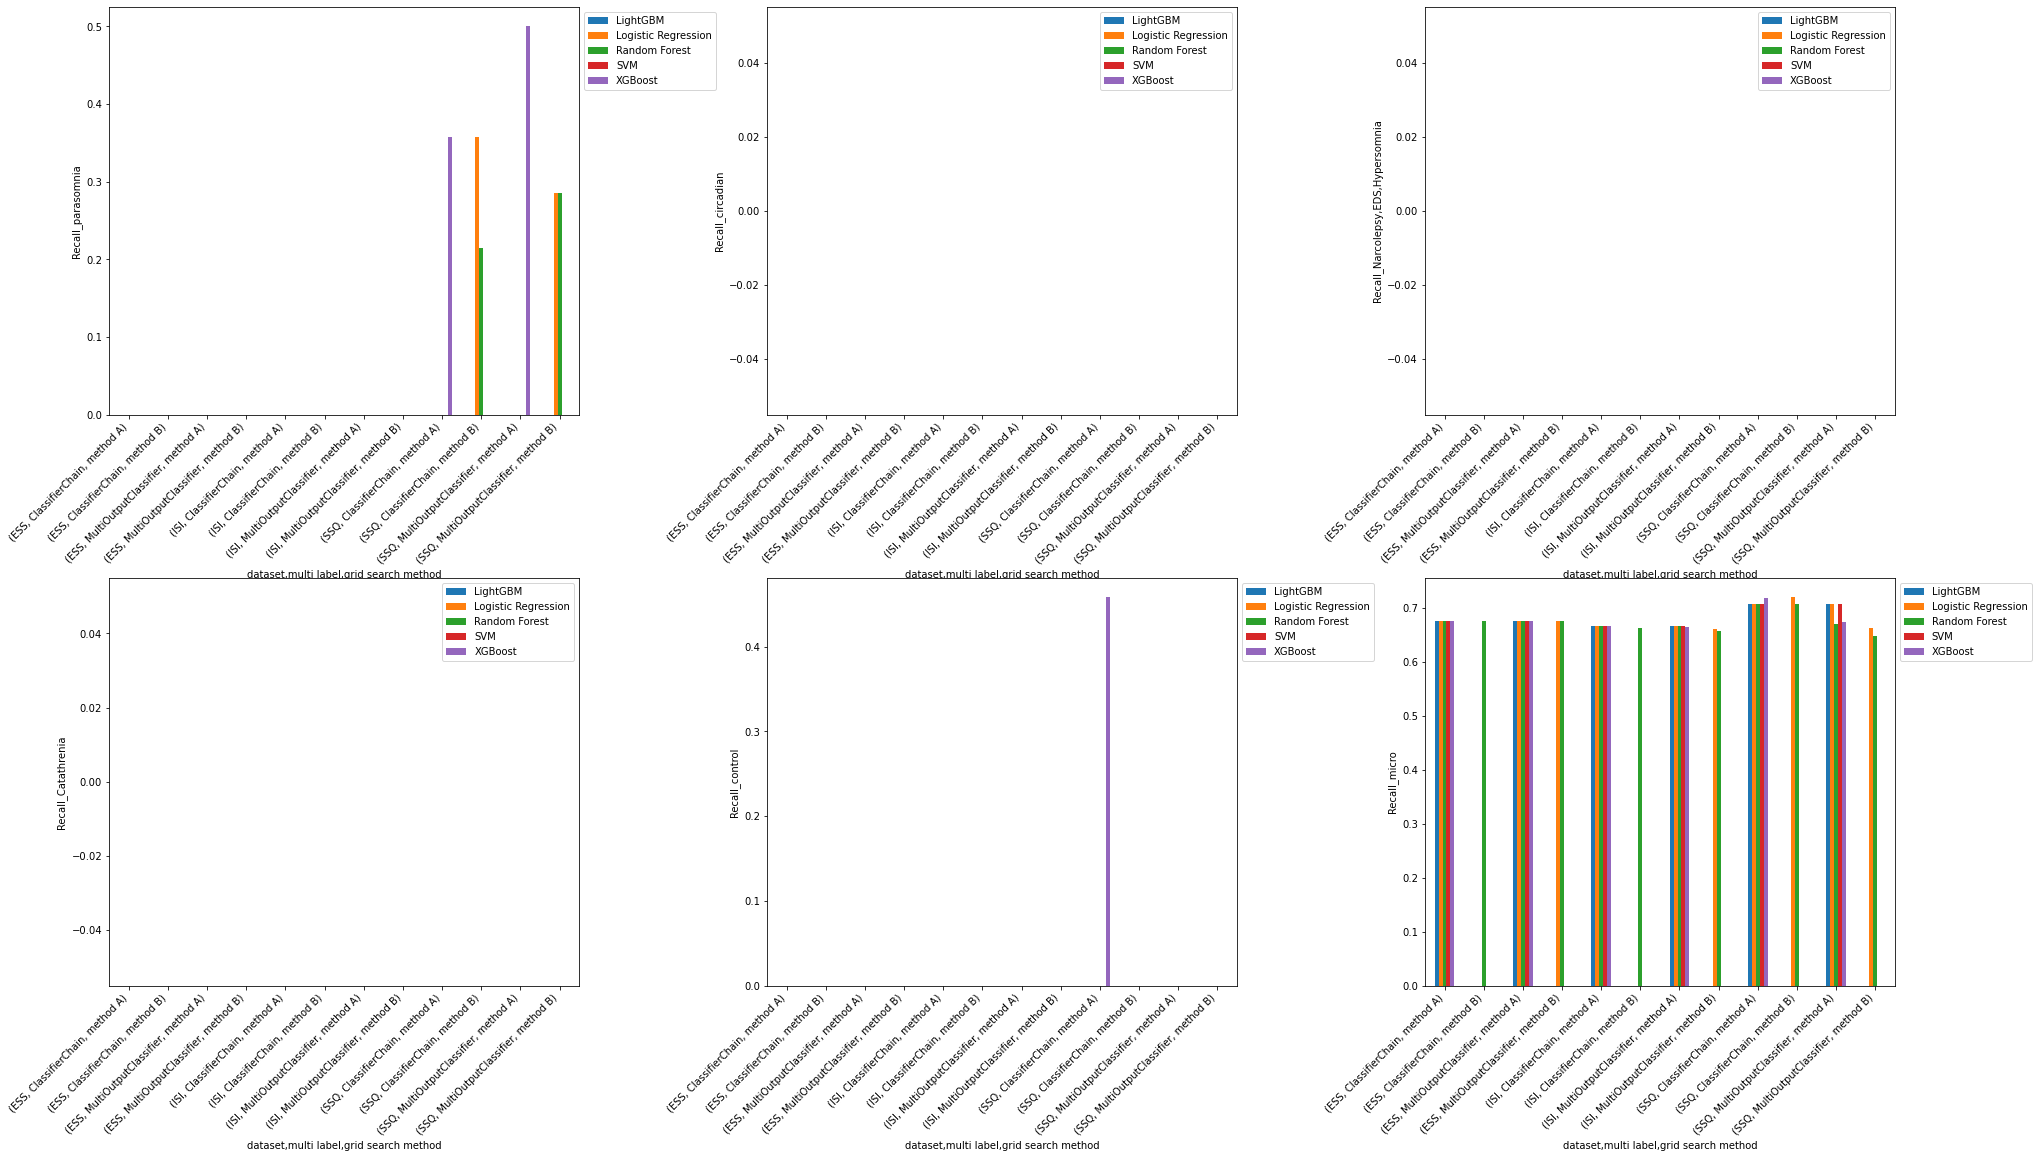

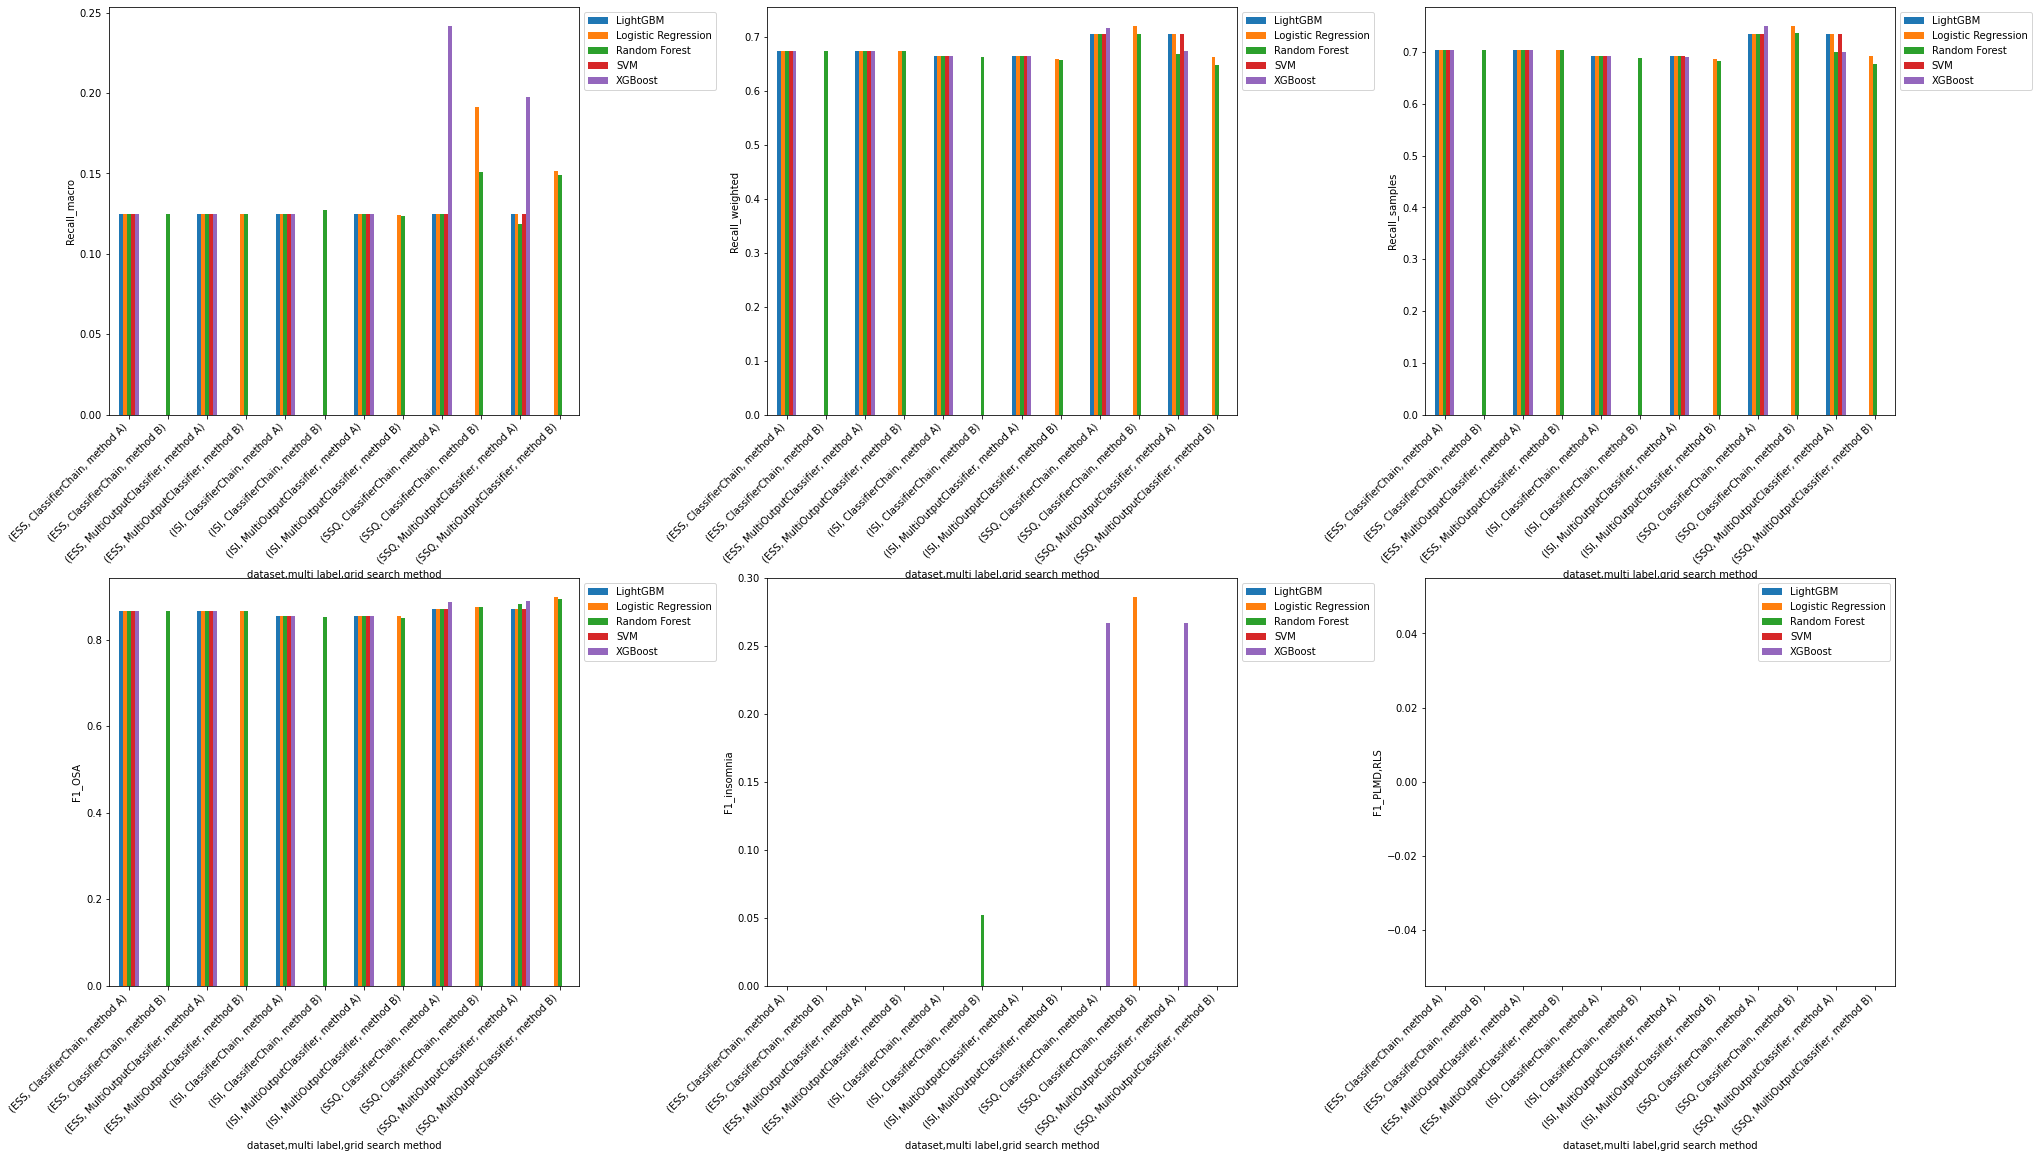

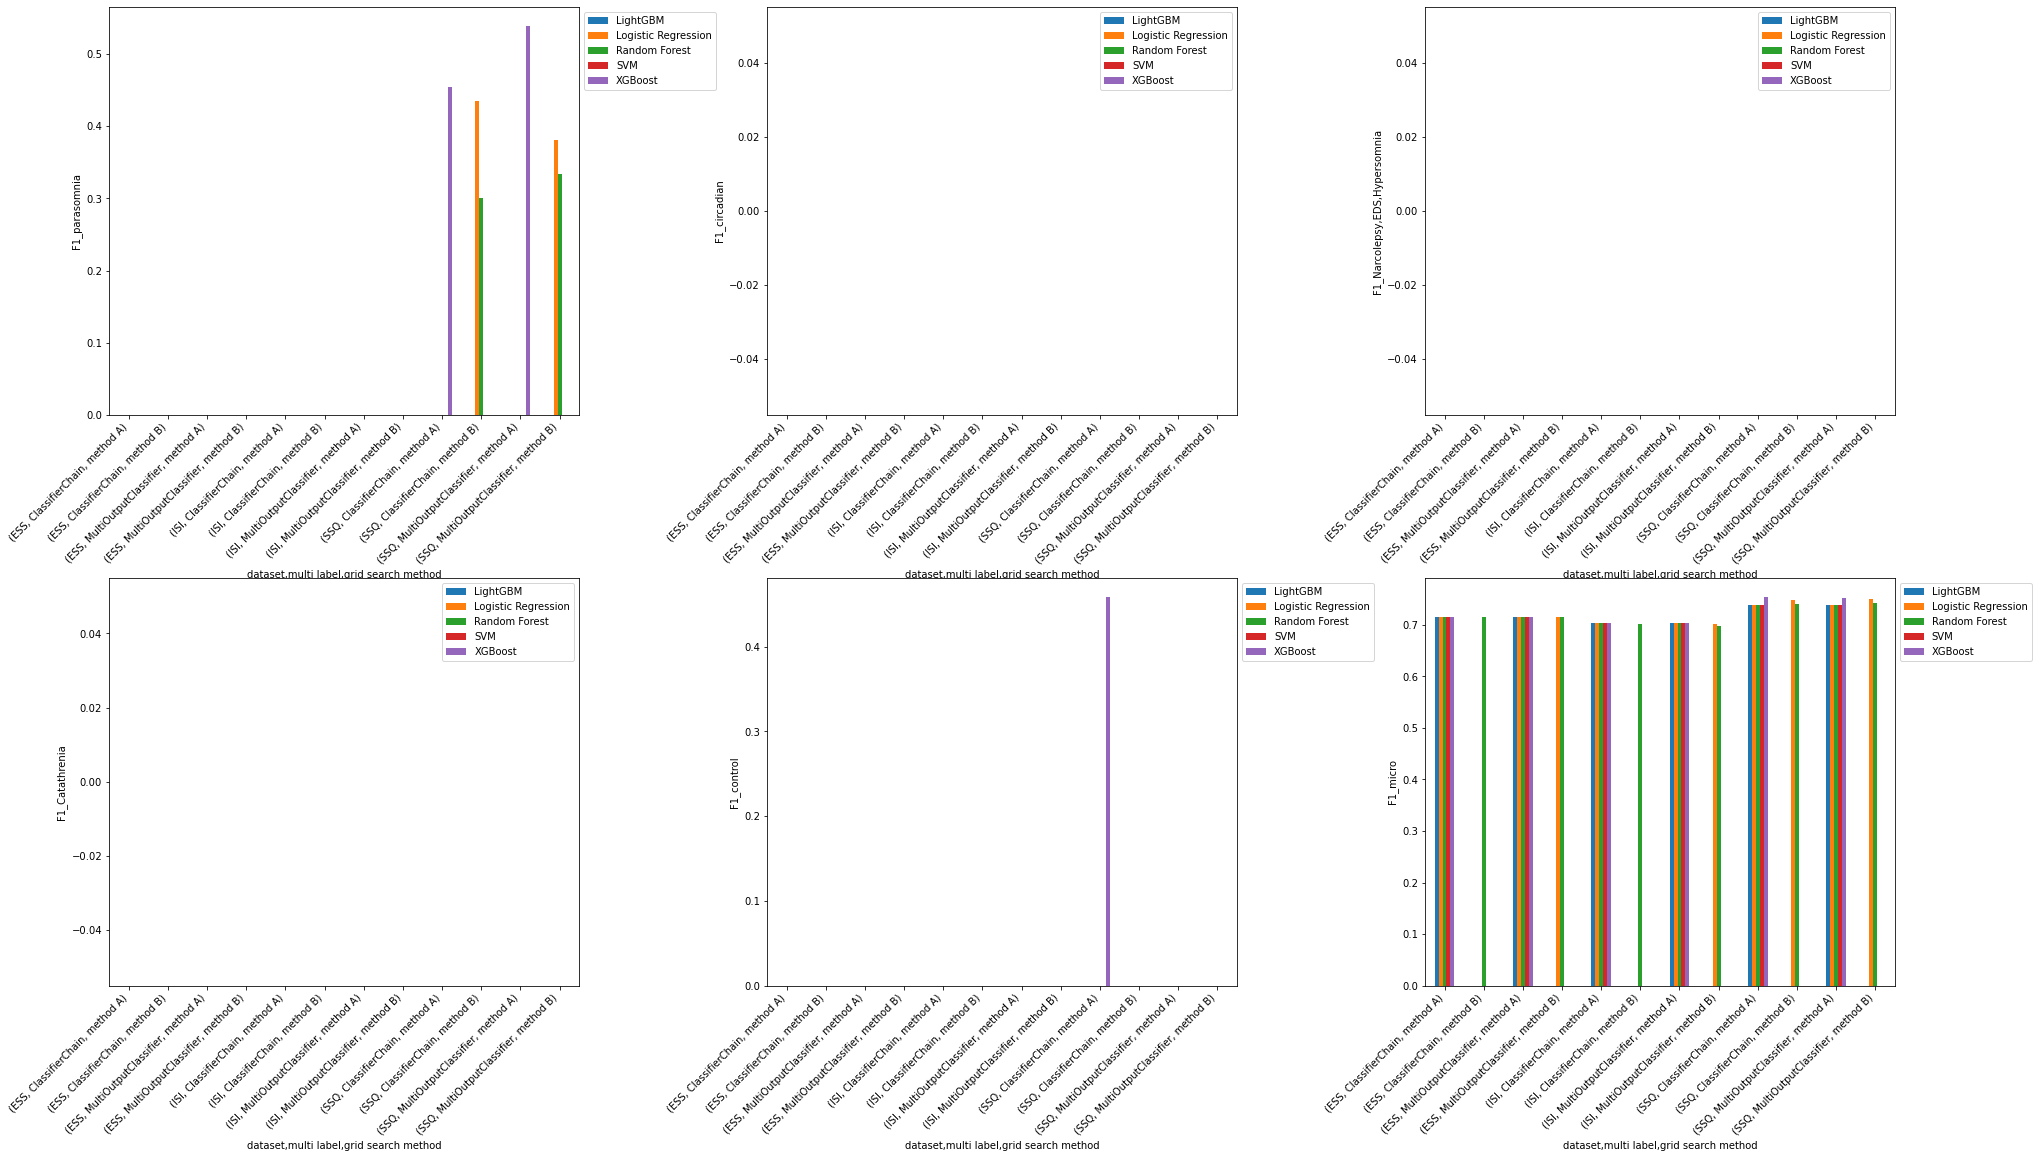

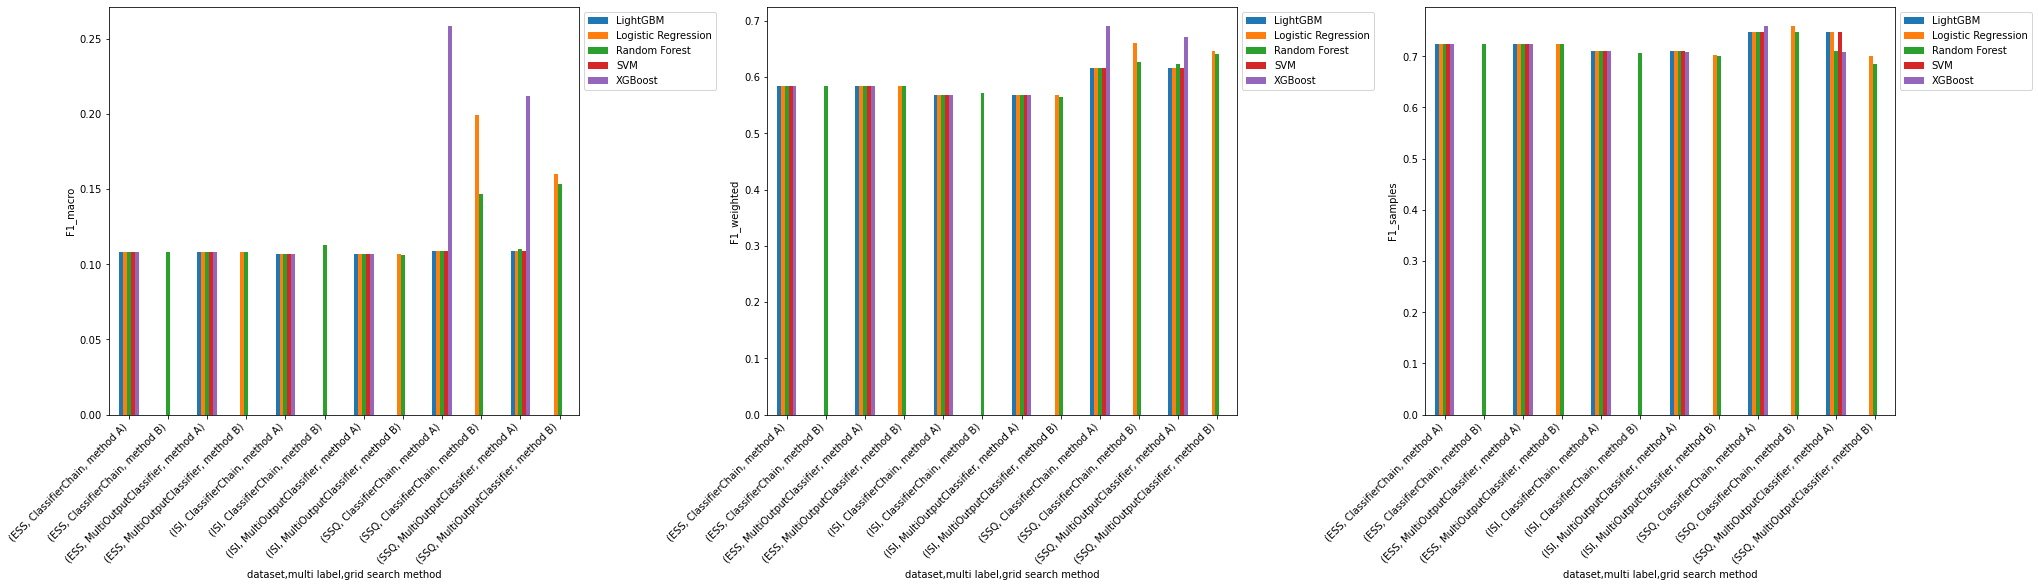

In [7]:
for cols in cols_list:
    plt.figure(figsize=(32, 18))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    for i, col in enumerate(cols):
        df = data.pivot_table(index='ML_Algorithm', columns=['dataset', 'multi label', 'grid search method'], values=col)
        ax = plt.subplot(2, 3, i+1)
        df.T.plot(kind='bar', ylabel=col, ax=ax)
        ax.legend(bbox_to_anchor=(1, 1))
        ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right')

In [8]:
isi = pd.read_csv('../data/isi_only_preprocessed.csv')
print(isi.shape)
ess = pd.read_csv('../data/ess_only_preprocessed.csv')
print(ess.shape)
ssq = pd.read_csv('../data/ssq_only_preprocessed.csv')
print(ssq.shape)

(5480, 15)
(5463, 16)
(2095, 17)
